In [56]:
from sklearn.datasets import load_digits
digits = load_digits()

In [57]:
type(digits)

sklearn.utils._bunch.Bunch

In [58]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [299]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
# Print to show there are 1797 images ( 8 by 8 images: dimentionsality of 64 )
print(" Image dataset shape : " , digits.data.shape)

 Image dataset shape :  (1797, 64)


In [301]:
images = digits.data
labels = digits.target

print(images.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


In [302]:
# Load and preprocess aditional Images 

from PIL import Image 
import numpy as np



In [303]:
image_paths = ['C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\0digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\0digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\1digit.png' , 
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\1digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\2digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\2digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\3digit.png' ,
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\3digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\4digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\5digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\5digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\6digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\6digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\7digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\7digit1.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\8digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\9digit.png',
              'C:\\Users\\arfan\\Desktop\\Bootcamp\\Lectures\\Task KNN\\Images\\9digit1.png'
                                                                                                 ]

In [304]:
my_images = []

for path in image_paths:
    image = Image.open(path).convert('L')  
    resized_image = image.resize((8, 8), Image.ANTIALIAS)
    image_array = np.array(resized_image)
    flattened_image = image_array.flatten() 
    my_images.append(flattened_image)

my_images = np.array(my_images)
#resized_images = my_images.resize((15,8,8) , Image.ANTIALIAS)

C:\Users\arfan\AppData\Local\Temp\ipykernel_32984\898171131.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((8, 8), Image.ANTIALIAS)


In [305]:
my_images.shape

(18, 64)

In [306]:
my_images.size

1152

In [307]:
augmented_data = np.concatenate((images, my_images))
augmented_labels = np.concatenate((labels, np.full(18, 10))) 

In [308]:
print(augmented_data.shape)
print(augmented_labels.shape)

(1815, 64)
(1815,)


In [309]:
my_images

array([[255, 255, 255, ..., 255, 255, 254],
       [255, 255, 254, ..., 252, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 255, 227, ..., 225, 255, 254],
       [255, 255, 254, ..., 255, 255, 255],
       [255, 255, 232, ..., 255, 255, 255]], dtype=uint8)

In [310]:
first_image = augmented_data[0,:]
x = augmented_data
x.shape

(1815, 64)

In [311]:
print(first_image)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


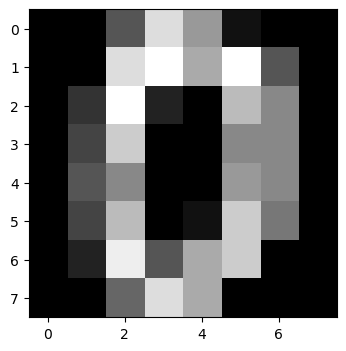

In [312]:
plt.figure(figsize=(10,4))
plt.imshow(np.reshape(first_image,(8,8)) , cmap = plt.cm.gray);

### visualizing Dataset

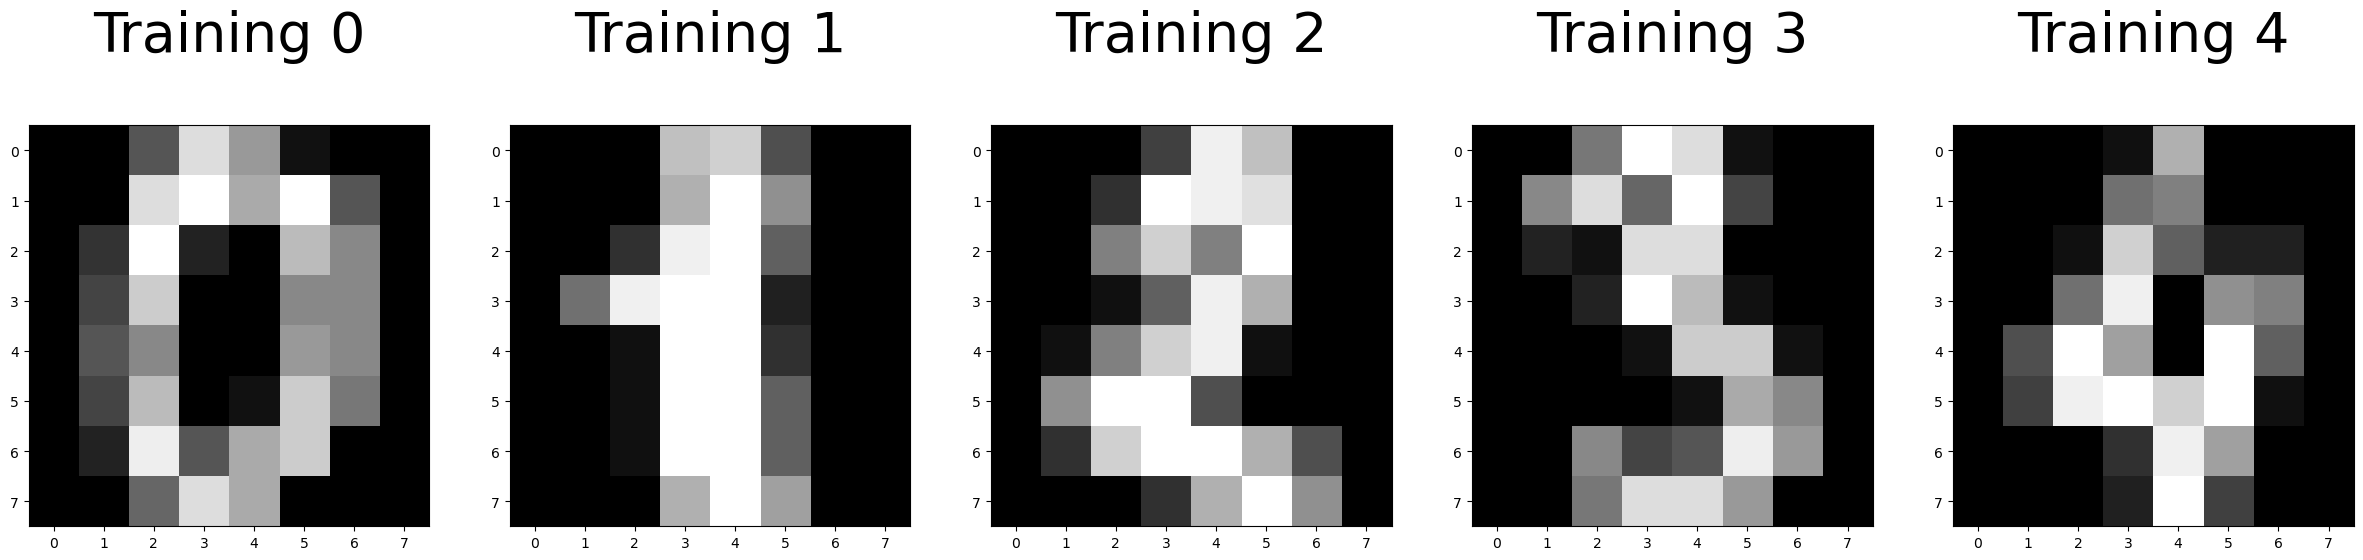

In [313]:
plt.figure(figsize=(30,7))
for i , (image , label) in enumerate(zip(augmented_data[0:5] ,augmented_labels[0:5] )):
    plt.subplot(1,5, i +1 )
    plt.imshow(np.reshape(image , (8 , 8)) , cmap = plt.cm.gray)
    plt.title('Training %i\n '  %label , fontsize =40)

### Splitting the Dataset

In [314]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(augmented_data,augmented_labels,test_size=0.30,random_state = 25,shuffle= True)
print(xtrain.shape , ytrain.shape)
print(xtest.shape , ytest.shape)

(1270, 64) (1270,)
(545, 64) (545,)


### Training 

In [315]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(xtrain , ytrain)

KNeighborsClassifier()

In [316]:
pred_knn = classifier.predict(xtest)


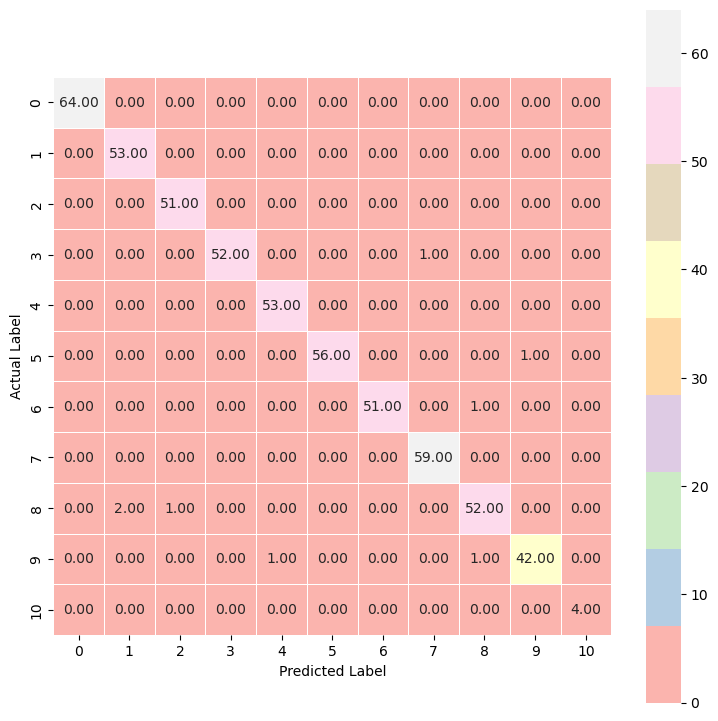

In [321]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest , pred_knn)
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True  , fmt = ".2f" , linewidths = 0.5 , square = True , cmap = 'Pastel1');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

### Comparing Error Rate with k value 

In [323]:
error = []
# Calculating error for k values between 1 and 40 
for i in range(1 , 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain , ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

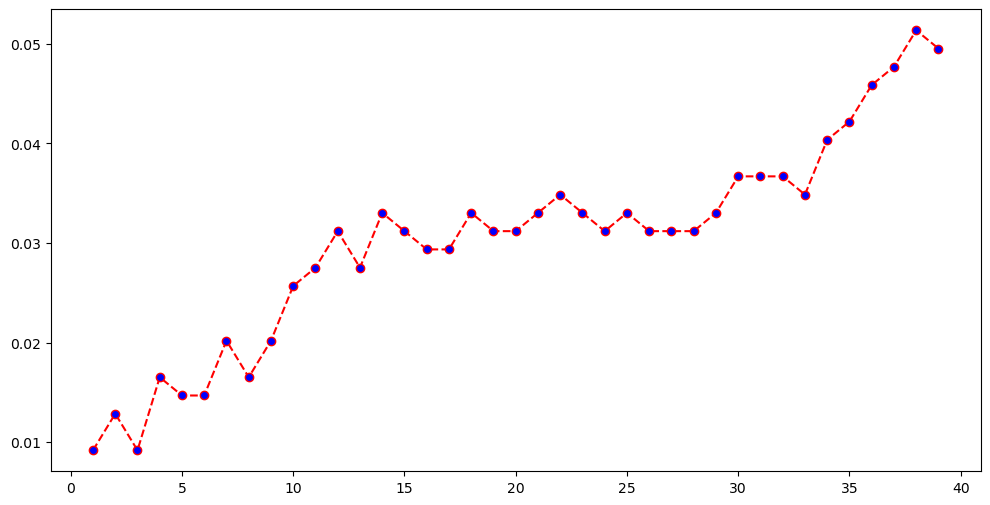

In [329]:
plt.figure(figsize = (12,6))
plt.plot(range(1,40) , error , color = 'red' , linestyle= '--' , marker = 'o' , markerfacecolor= 'blue');

### Saving the model 

In [331]:
import joblib
joblib.dump(classifier , 'NB-digitclassification_after_Adding_images')

['NB-digitclassification_after_Adding_images']